Selim Göktuğ Cankurtaran Machine Learning Project

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

# Read and Explore

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Die ersten 10 Daten des Datensatzes. Auf den ersten Blick fallen die NaN-Daten im bmi-Attribut auf.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- gender-, ever_married-, Residence_type-, smoking_status-Attribute sind Textattribute.
- id, age, avg_glucose_level und bmi-Attribute sind Numerischattribute.
- hypertension, heart_disease und stroke sind Binaryattribute.
- Das bmi-Attribut hat 201 fehlende Werte.

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- Fehlende Werte

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.shape

(5110, 12)

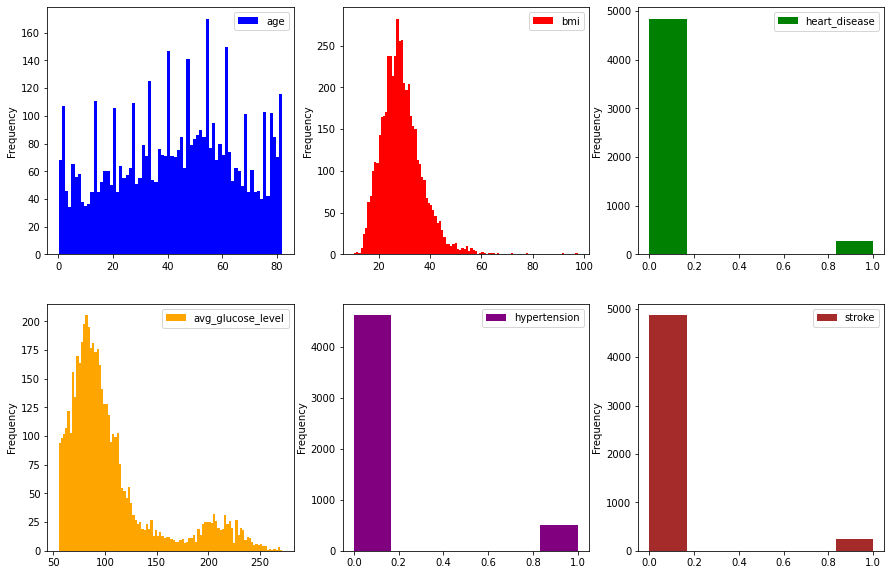

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[0][2])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][0])
df.plot(kind="hist", y="hypertension", bins=6, color="purple", ax=axes[1][1])
df.plot(kind="hist", y="stroke", bins=6, color="brown", ax=axes[1][2])
plt.show()

- Auf den ersten Blick lässt sich sagen, dass das age-Attribut eine gute Verteilung aufweist.
- Das bmi-Attribut kann Ausreißern enthalten.

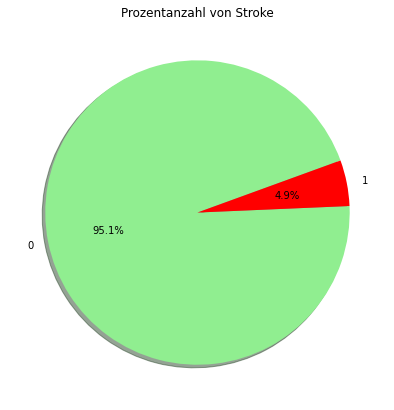

In [ ]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=["lightgreen","red"], autopct='%1.1f%%', shadow=True, startangle=20,)

plt.title('Prozentanzahl von Stroke')
plt.show()

- 5% der Menschen haben einen Schlaganfall

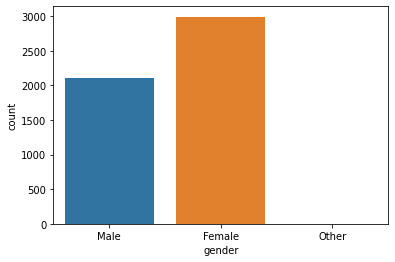

In [ ]:
plt.figure()
sns.countplot(data=df,x='gender');

- Es gibt ungefähr 1000 Unterschiede zwischen Frauen und Männern in den Daten.

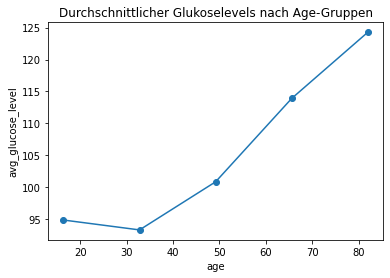

In [ ]:
age_glc_binned_stats = stats.binned_statistic(df.age, df.avg_glucose_level, statistic='mean', bins=5, range=(0,82))
gluc_lev = age_glc_binned_stats[0]
age_ = age_glc_binned_stats[1]
plt.plot(age_[1:],gluc_lev,linestyle="-",marker = "o")
plt.xlabel("age")
plt.ylabel("avg_glucose_level")
plt.title("Durchschnittlicher Glukoselevels nach Age-Gruppen")
plt.show()

- Der durchschnittliche Glukosespiegel ist bei alten Menschen hoch.

## Stroke oder nicht Pairplot Matrix

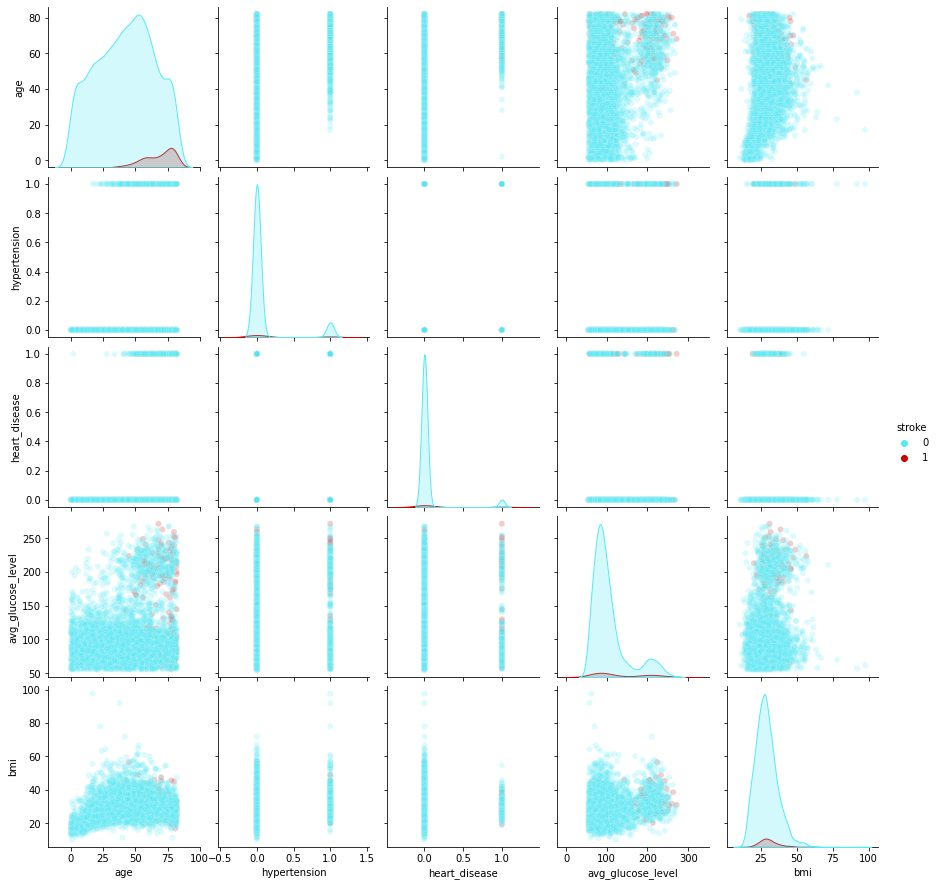

In [ ]:
sns.pairplot(df.drop(columns='id',axis=1), hue = "stroke", plot_kws={'alpha':0.2}, palette = ['#56EAF5','#C90000'])

## Korrelation Heatmap

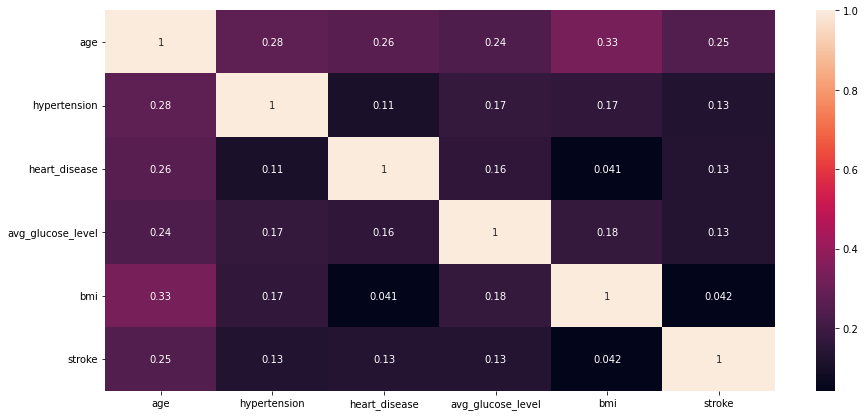

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df[['gender', 'age',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'avg_glucose_level',	'bmi',	'smoking_status',	'stroke']].corr(),annot=True);

- Gar keine Korrelation zwischen bmi und stroke.

## Boxplots

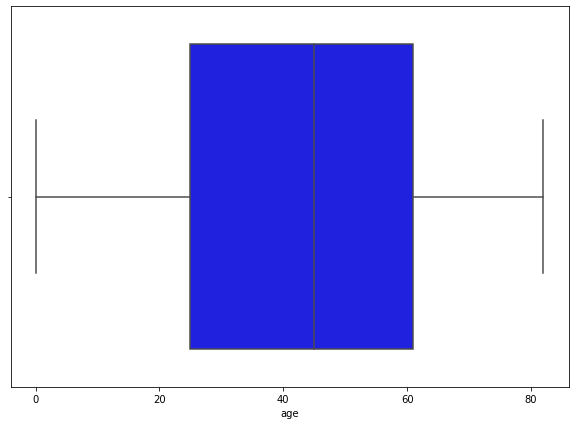

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["age"],color='blue');

- Age meist zwischen ca. 25 und 62 verteilt

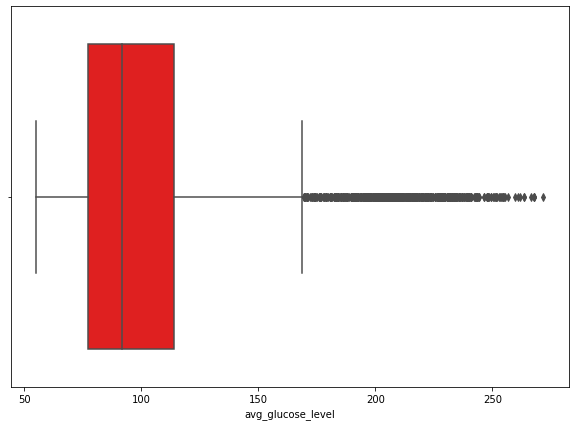

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["avg_glucose_level"],color='Red');

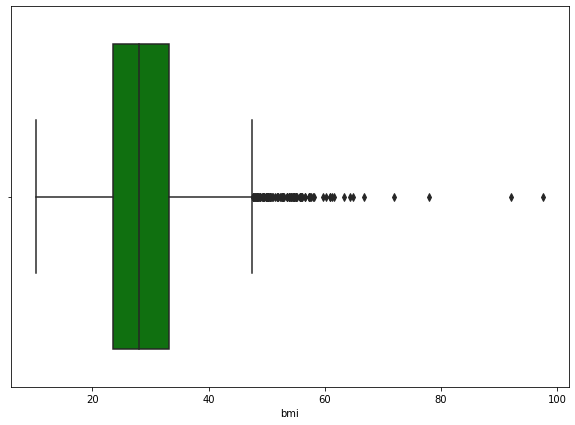

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

Wir haben Ausreißer im BMI, die wir brauchen, um diese Daten zu bereinigen.

## Countplots

Stroke and Ever Married

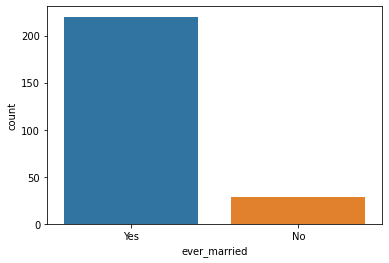

In [ ]:
plt.figure()
stroked=df.loc[df['stroke']==1]
sns.countplot(data=stroked,x='ever_married');

- Offenbar haben Verheiratete deutlich mehr Schlaganfälle als Alleinstehende.

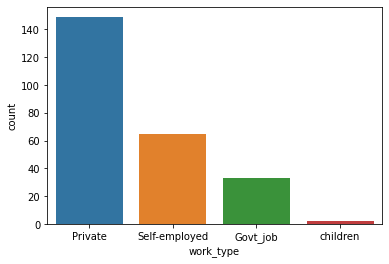

In [ ]:
plt.figure()
sns.countplot(data=stroked,x='work_type');

Menschen in der Privatwirtschaft haben ein höheres Schlaganfallrisiko

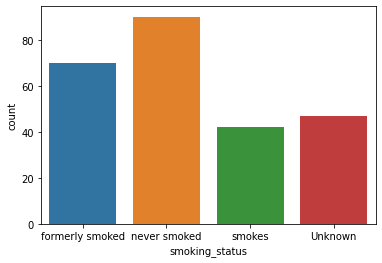

In [ ]:
plt.figure()
sns.countplot(data=stroked,x='smoking_status');

Raucher und Ex-Raucher haben insgesamt das höchste Schlaganfallrisiko.

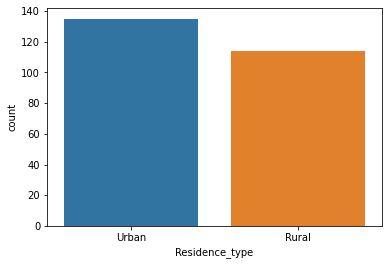

In [ ]:
plt.figure()
sns.countplot(data=stroked,x='Residence_type');

Es gibt eine enge Verteilung zwischen städtischen und ländlichen Wohnformen. Es kann gesagt werden, dass es keinen großen Einfluss auf den Schlaganfall hat.

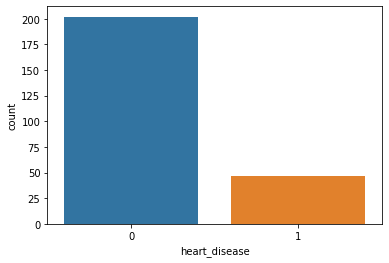

In [ ]:
plt.figure()
sns.countplot(data=stroked,x='heart_disease');

Laut unseren Daten haben Menschen ohne vorherige Herzerkrankung ein höheres Risiko, einen Schlaganfall zu erleiden.

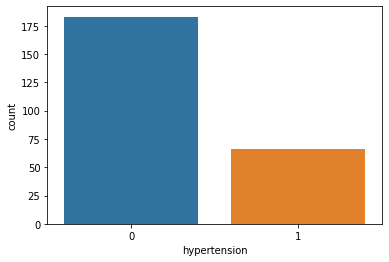

In [ ]:
plt.figure()
sns.countplot(data=stroked,x='hypertension');

Mehr als 25% der Schlaganfallfälle hatten Bluthochdruck.

## Schlaganfallraten nach Textattributen

In [ ]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
stroke_or_not = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
stroke_or_not["percent"] = (stroke_or_not[1]/stroke_or_not[0])*100
stroke_or_not

stroke                             0    1   percent
gender         Female           2853  141  4.942166
               Male             2007  108  5.381166
               Other               1    0  0.000000
Residence_type Rural            2400  114  4.750000
               Urban            2461  135  5.485575
smoking_status Unknown          1497   47  3.139613
               formerly smoked   815   70  8.588957
               never smoked     1802   90  4.994451
               smokes            747   42  5.622490

# Data Preprocessing

## BMI

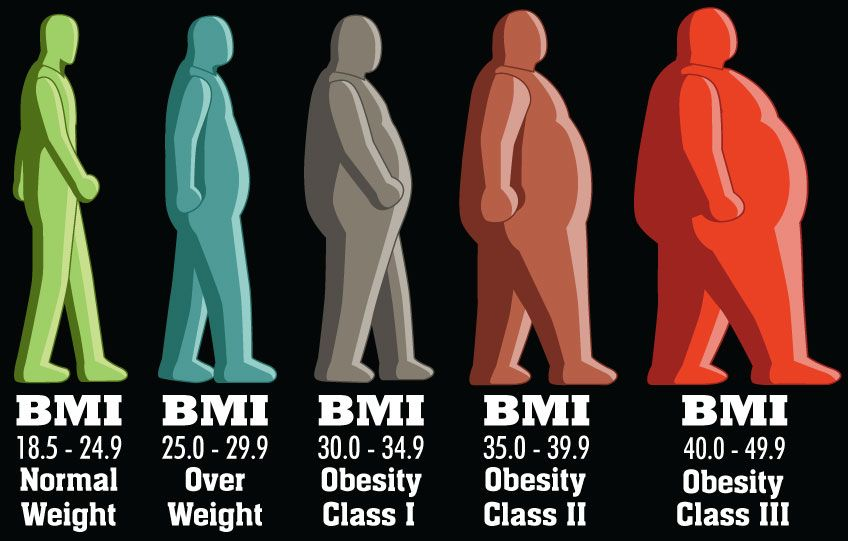

- BMI kann nicht mehr als 50 sein.
- Bmi-Daten mehr als 50 sind Ausreißern.

In [ ]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

79 Werte sind grösser 50.

In [ ]:
print(bmi_outliers['stroke'].value_counts())

0    78
1     1
Name: stroke, dtype: int64


Eine davon hatte einen Schlag.

In [ ]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
bmi_mean = df["bmi"].mean()
df["bmi"] = df["bmi"].fillna(bmi_mean)

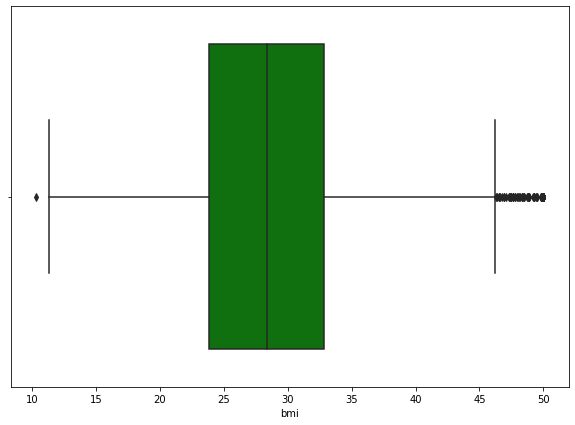

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- Eine letzte Kontrolle.

## Skalierung von Features



In [ ]:
df=df.drop(columns='id',axis=1)

Drop ID-Atrribute.

In [ ]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

 
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.791465,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.791465,0,0,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,0,1,0,0


Binäre Daten werden in 0's und 1's umgewandelt und kategoriale Daten werden mit pd.get_dummies in numerische Daten umgewandelt.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = scaler.fit_transform(df[columns])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

avg_glucose_level, bmi und Altersdaten wurden mit dem Standardscaler standardisiert und id-Attribute dropped.

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,2.706375,1.067297e+00,1.051434
1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,2.121559,3.399179e-15,0.786070
2,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,-0.005028,5.068952e-01,1.626390
3,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1.437358,7.665936e-01,0.255342
4,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1.501184,-6.549137e-01,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,-0.494658,3.399179e-15,1.626390
5106,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0.420775,1.532021e+00,1.670617
5107,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.511443,2.471967e-01,-0.363842
5108,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1.328257,-4.362202e-01,0.343796


Merging skalisierte Daten mit originale Daten.

# Train - Test Split


In [ ]:
y = df["stroke"]
X = df.drop(['stroke'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)
print(f'Gesamtzahl der Stichprobe im gesamten Datensatz: {len(X)}')
print(f'Gesamtzahl der Stichprobe im Train-Datensatz: {len(X_train)}')
print(f'Gesamtzahl der Stichprobe im Test-Datenansatz: {len(X_test)}')

Gesamtzahl der Stichprobe im gesamten Datensatz: 5110
Gesamtzahl der Stichprobe im Train-Datensatz: 3832
Gesamtzahl der Stichprobe im Test-Datenansatz: 1278


# Logistic Regression

## Einführung in das Logistic Regression

Die logistische Regression ist ein Prozess zur Modellierung der Wahrscheinlichkeit eines diskreten Ergebnisses bei gegebener Eingabevariable. Die gebräuchlichste logistische Regression modelliert ein binäres Ergebnis; etwas, das zwei Werte annehmen kann, z. B. true oder false.

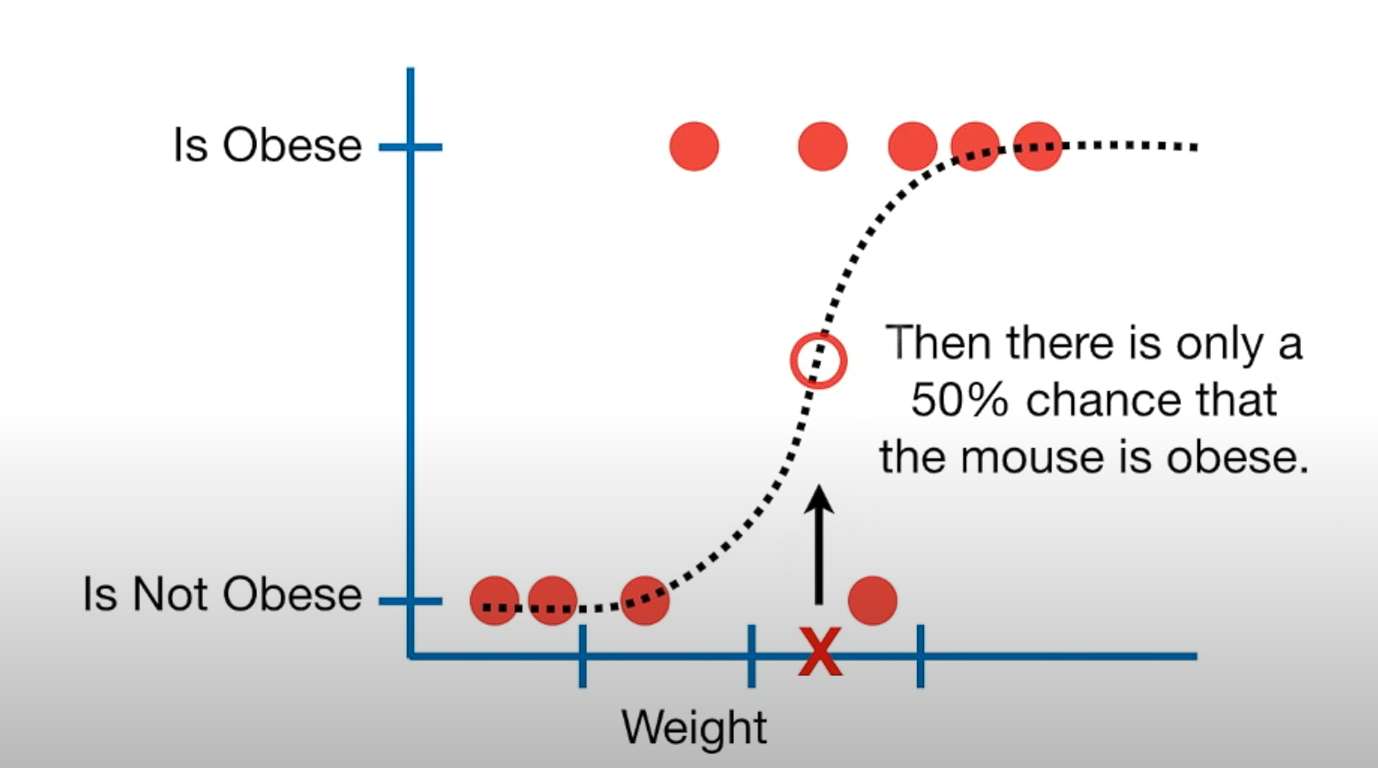

Bei der linearen Regression passten wir die Daten, die wir hatten, in eine gerade Linie ein. In der logistischen Regression wird diese Linie an eine "s"-förmige Funktion angepasst.
Wie aus diesem logistischen Regressionsbeispiel, das auf einen einfacheren Datensatz angewendet wird, ersichtlich ist, besteht eine 50%ige Chance, dass wir die Maus als "fettleibig" klassifizieren, wenn eine neu hinzugefügte Maus ein durchschnittliches Gewicht hat.

## Anwendung der logistischen Regression auf den vorliegenden Datensatz

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[1208    0]
 [  69    1]]
-------------------------------------------
Accuracy of Logistic Regression: 94.60093896713614 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       1.00      0.01      0.03        70

    accuracy                           0.95      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.95      0.95      0.92      1278



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


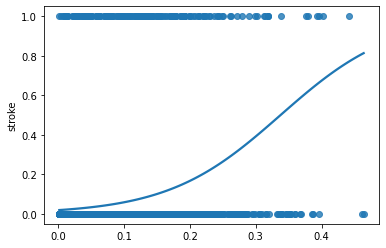

In [ ]:
sns.regplot(x=lr.predict_proba(X_train)[:,1], y=y_train, logistic=True, ci=None)

In [ ]:
predicted_probab_log = lr.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

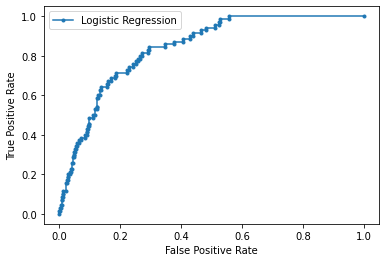

In [ ]:
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Je näher die ROC-Kurve an der Ecke liegt, desto besser ist die Anpassung.

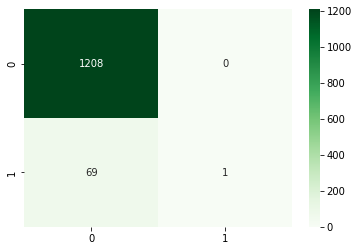

In [ ]:
sns.heatmap(lr_conf_matrix, annot=True,fmt='d',cmap="Greens");

Heatmap von Confussion Matrix